In [3]:
import boto3
import pandas as pd
import numpy as np
import io
from io import StringIO
from sklearn.preprocessing import normalize
# from skbio.diversity import alpha_diversity
# from skbio import TreeNode

In [4]:
s3 = boto3.resource('s3')
S3_client = boto3.client('s3')
bucket = "siwamicrobiome"
bucket_s3= s3.Bucket(bucket)

In [5]:
tax_obj = S3_client.get_object(Bucket=bucket, Key="exports/20220930/20220930.taxonomy_processed.csv")
tax_data = tax_obj['Body'].read()
tax_df = pd.read_csv(io.BytesIO(tax_data), sep=',')
tax_df

,Kingdom,Phylum,Class,Order,Family,Genus,Species,OTU,SciName
0,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,UNKNOWN,45d4fe3f6c01f77c2dfc11dd91d3359a,Lactobacillus UNKNOWN
1,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,UNKNOWN,0df6c802966e8670279671824da4f10a,Lactobacillus UNKNOWN
2,Bacteria,Firmicutes,Bacilli,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,2ef1e51ab1cf99a3c6417b05a060830e,UNKNOWN UNKNOWN
3,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium_sensu_stricto_1,UNKNOWN,40874d61006874f7c87d904707d320d9,Clostridium_sensu_stricto_1 UNKNOWN
4,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Blautia,UNKNOWN,c6c3ab4e828fb40d6e05967b7aac9338,Blautia UNKNOWN
...,...,...,...,...,...,...,...,...,...
5221,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Fournierella,UNKNOWN,1fe38d3fa527f5c654a6174fd0cbe4da,Fournierella UNKNOWN
5222,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,UNKNOWN,UNKNOWN,UNKNOWN,91a676270efe06b60abc00f2fb48d116,UNKNOWN UNKNOWN
5223,Bacteria,Proteobacteria,Alphaproteobacteria,Reyranellales,Reyranellaceae,Reyranella,UNKNOWN,74b1cce8fa53b00167441931bea43cf3,Reyranella UNKNOWN
5224,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium,UNKNOWN,5ebe9750649a36dac2a6bca59672e870,Corynebacterium UNKNOWN


In [6]:
otu_obj = S3_client.get_object(Bucket=bucket, Key='exports/20220930/20220930.feature-table.tsv')
otu_data = otu_obj['Body'].read()
otu_df = pd.read_csv(io.BytesIO(otu_data), sep='\t')
otu_df

,0087_01F-M,0087_02F-M,0087_03F-M,0087_04F-M,0087_05F-M,0087_06F-M,0088_01F-M,0088_02F-M,0088_03F-M,0088_04F-M,...,C120_04C-M,C120_05C-M,C120_06C-M,C124_01F-M,C124_02F-M,C124_03F-M,C124_04F-M,C124_05F-M,C124_06F-M,OTU
0,384.0,92.0,71.0,61.0,106.0,75.0,104.0,1711.0,187.0,574.0,...,1622.0,112.0,164.0,368.0,1073.0,109.0,168.0,534.0,4384.0,45d4fe3f6c01f77c2dfc11dd91d3359a
1,70.0,276.0,67.0,482.0,929.0,72.0,73.0,174.0,75.0,304.0,...,352.0,47.0,81.0,231.0,160.0,78.0,476.0,7129.0,631.0,0df6c802966e8670279671824da4f10a
2,382.0,882.0,92.0,494.0,2126.0,109.0,1251.0,1394.0,129.0,359.0,...,155.0,227.0,176.0,481.0,3125.0,253.0,1881.0,4869.0,336.0,2ef1e51ab1cf99a3c6417b05a060830e
3,35.0,43.0,73.0,60.0,35.0,48.0,48.0,323.0,270.0,54.0,...,93.0,118.0,79.0,244.0,97.0,60.0,135.0,1035.0,199.0,40874d61006874f7c87d904707d320d9
4,1245.0,88.0,665.0,450.0,436.0,754.0,1914.0,535.0,377.0,2406.0,...,45.0,34.0,44.0,123.0,44.0,54.0,42.0,228.0,66.0,c6c3ab4e828fb40d6e05967b7aac9338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1fe38d3fa527f5c654a6174fd0cbe4da
5222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,91a676270efe06b60abc00f2fb48d116
5223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,74b1cce8fa53b00167441931bea43cf3
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5ebe9750649a36dac2a6bca59672e870


In [7]:
meta_obj = S3_client.get_object(Bucket=bucket, Key='exports/20220930/20220930.mapfile_alpha.csv')
meta_data = meta_obj['Body'].read()
meta_df = pd.read_csv(io.BytesIO(meta_data))
meta_df

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,C116_06I-M,CTTGTTGTTCTG,C116,2.0,Na0.16CI0.25,42.0,6.0,I,M,Broiler,C1,Iluma,27.0,3.0,GTGTGYCAGCMGCCGCGGTAA,18,B10,0116_06I-M_96,4.133520,131
350,C119_02I-M,GGATGTCTTCGC,C119,5.0,Na0.34CI0.25,42.0,2.0,I,M,Broiler,C1,Iluma,26.0,1.0,GTGTGYCAGCMGCCGCGGTAA,18,B12,0119_02I-M_96,1.530244,30
351,C119_03I-M,CGTGTCCGTGTC,C119,5.0,Na0.34CI0.25,42.0,3.0,I,M,Broiler,C1,Iluma,17.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C1,0119_03I-M_96,5.679060,194
352,C119_04I-M,CTTGGTAGTGCC,C119,5.0,Na0.34CI0.25,42.0,4.0,I,M,Broiler,C1,Iluma,38.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C2,0119_04I-M_96,2.709722,42


In [8]:
def get_dict_level(Level, TaxaDataframe):
    """Return dict. Keys are the unique taxa names for that level and values are lists of the otus for that name.
    TaxaDataframe must have OTU as column."""
    level_uniques = list(TaxaDataframe[Level].unique())
    dict_level_otus = dict(
        zip(
            level_uniques,
            [
                list(set(TaxaDataframe[TaxaDataframe[Level] == i].OTU))
                for i in level_uniques
            ],
        )
    )
    return dict_level_otus

In [9]:
def get_experiment(META, DF, TAXA, ExperimentID):
    """Get the dataframes for the experiment in the same order as the input.
    df_meta column Project
    """
    meta_experiment = META[META.Project == ExperimentID]
    print("Number of samples for that experiment {}".format(meta_experiment.shape[0]))
    samples = list(meta_experiment.SampleID)
    samples = [i for i in samples if i in DF.columns]  # verificar que tengan microbiome
    print("Number of samples with microbiome {}".format(len(samples)))
    if (
        not meta_experiment[meta_experiment.duplicated(subset=["SampleID"])].shape[0]
        > 0
    ):
        samples.append("OTU")
        DF_subset = DF[samples]
        print("Total shape OTUS subset {}".format((DF_subset.shape)))
        DF_subset = DF_subset[DF_subset.drop("OTU", axis=1).sum(axis=1) >= 1]
        print("After removing zero counts {}".format(DF_subset.shape))
        TAXA_subset = TAXA[TAXA.OTU.isin(list(DF_subset.OTU))]
        print("Taxa size {}".format(TAXA_subset.shape))
        return [meta_experiment, DF_subset, TAXA_subset]
    else:
        print("OJO: DUPLICADOS!")


In [10]:
def convert_relative(otus_table_df):
    """otus_table_df must have OTU as column."""
    otus_table_df = otus_table_df.fillna(0)
    otus = list(otus_table_df.OTU)
    otus_table_df.index = otus
    otus_table_df = otus_table_df.drop("OTU", axis=1)
    samples = list(otus_table_df.columns)
    df_norm = pd.DataFrame(normalize(otus_table_df.values.T, axis=1, norm="l1").T)
    df_norm.columns = samples
    df_norm.index = otus
    print("OTUS are index")
    return df_norm

In [11]:
def aggregate_taxa(Level, TaxaDataframe, OTUDataframe):
    """OTUDataframe must have OTUs as INDEX, not column.
    TaxaDataframe must have OTU as column."""
    dict_agg = get_dict_level(Level, TaxaDataframe)
    return pd.DataFrame.from_dict(
        {
            key: list(
                OTUDataframe.loc[
                    dict_agg[key],
                ].sum(axis=0, skipna=True)
            )
            for key in dict_agg.keys()
        },
        orient="index",
        columns=OTUDataframe.columns,
    )

In [12]:
def ratio1(
    df_otus,
    df_taxa,
    level="Genus",
    taxas=["Lactobacillus", "Escherichia-Shigella"],
    indexname="ratio1",
):
    """Ratio and log of ratio between two taxas of the same taxonomy level."""
    if taxas[0] in df_taxa[level].unique() and taxas[1] in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        df_taxa0_taxa1 = df_agg.loc[
            taxas,
        ]
        taxa_den = taxas[1]
        taxa_num = taxas[0]
        min_deno = np.min(df_taxa0_taxa1.loc[taxa_den])
        min_num = np.min(df_taxa0_taxa1.loc[taxa_num])
        if min_deno == 0:  ### Corregir denominador cero
            print("Corregir denominador")
            samples_zero_den = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_den] == min_deno]
            )
            second_last_den = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_den]) if i != 0
            ][0]
            # print(second_last_den)
            df_taxa0_taxa1.loc[taxa_den, samples_zero_den] = second_last_den
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_num] == min_num]
            )
            second_last_num = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_num]) if i != 0
            ][0]
            # print(second_last_num)
            df_taxa0_taxa1.loc[taxa_num, samples_zero_num] = second_last_num

        df_taxa0_taxa1.loc[indexname] = (
            df_taxa0_taxa1.loc[taxas[0]] / df_taxa0_taxa1.loc[taxas[1]]
        )
        df_taxa0_taxa1.loc["{}LOG".format(indexname)] = df_taxa0_taxa1.loc[
            indexname
        ].apply(lambda x: np.log(x))
        return df_taxa0_taxa1
    else:
        print("At least one taxa not found in {} level.".format(level))
        return None


In [13]:
def ratio3(df_otus, df_taxa, level="Genus", taxa="Lactobacillus"):
    """One taxa vs others."""
    if taxa in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        series_taxa = df_agg.loc[
            taxa,
        ]
        series_rest = (
            df_agg.loc[
                df_agg.index != taxa,
            ]
            .sum(axis=0, skipna=True)
            .rename("Others")
        )
        df_ratio3 = pd.concat([series_taxa, series_rest], axis=1).T
        min_num = np.min(df_ratio3.loc[taxa])
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(df_ratio3.columns[df_ratio3.loc[taxa] == min_num])
            second_last_num = [i for i in sorted(df_ratio3.loc[taxa]) if i != 0][0]
            print(second_last_num)
            df_ratio3.loc[taxa, samples_zero_num] = second_last_num
        df_ratio3.loc["ratio3"] = df_ratio3.loc[taxa] / df_ratio3.loc["Others"]
        df_ratio3.loc["ratio3LOG"] = df_ratio3.loc["ratio3"].apply(lambda x: np.log(x))

        return df_ratio3
    else:
        print("Taxa not found in {} level.".format(level))
        return None


In [14]:
otu_df.columns
meta_df[meta_df.Project == "E347"]

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,E347,Iluma,23.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,E347,Iluma,13.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,E347,Iluma,30.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,E347,Iluma,10.0,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13


In [15]:
list_exp = get_experiment(meta_df, otu_df, tax_df, "E347")

Number of samples for that experiment 179
Number of samples with microbiome 179
Total shape OTUS subset (5226, 180)
After removing zero counts (1977, 180)
Taxa size (1977, 9)


In [16]:
list_exp[0].to_csv("data/metadata_E347.csv", header=True, index=False)
list_exp[1].to_csv("data/otus_E347.csv", header=True, index=False)
list_exp[2].to_csv("data/taxonomy_E347.csv", header=True, index=False)

In [17]:
TAXA = list_exp[2]
OTUS = list_exp[1]
df_ratio1 = ratio1(OTUS, TAXA)
df_ratio2 = ratio1(OTUS, TAXA, level="Phylum", taxas=["Firmicutes", "Proteobacteria"], indexname="ratio2")
df_ratio3 = ratio3(OTUS, TAXA)

OTUS are index


Corregir denominador
OTUS are index
Corregir denominador
OTUS are index


In [18]:
df_123 = pd.concat([df_ratio1,df_ratio2, df_ratio3], axis=0).loc[["ratio1LOG", "ratio2LOG", "ratio3LOG"]]
df_123 = df_123.transpose()
df_123["SampleID"] = df_123.index
df_123.head()

,ratio1LOG,ratio2LOG,ratio3LOG,SampleID
0115_01C-M,1.618213,3.106179,-1.445178,0115_01C-M
0115_02C-M,2.716784,2.769024,-0.474775,0115_02C-M
0115_03C-M,0.110712,2.805703,-3.940691,0115_03C-M
0115_04C-M,0.583749,1.224999,-3.193350,0115_04C-M
0116_05C-M,0.987387,4.716264,-4.531123,0116_05C-M


In [19]:
df_metadata = list_exp[0]
df_metadata = pd.merge(
        left=df_metadata,
        right=df_123,
        how="left",
        on="SampleID",copy=False
    )
df_metadata.head()
df_metadata.to_csv("data/metadata_E347.csv", header=True, index=False)

In [20]:
df_metadata

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed,ratio1LOG,ratio2LOG,ratio3LOG
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101,1.618213,3.106179,-1.445178
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74,2.716784,2.769024,-0.474775
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103,0.110712,2.805703,-3.940691
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118,0.583749,1.224999,-3.193350
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69,0.987387,4.716264,-4.531123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57,5.019363,5.244012,-0.263935
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57,-2.257514,-0.880712,-2.731836
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62,4.711114,4.734802,0.692398
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13,6.891672,7.609720,0.135025


C:\Users\jmontoyas\AppData\Local\Temp\ipykernel_14040\281562721.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)


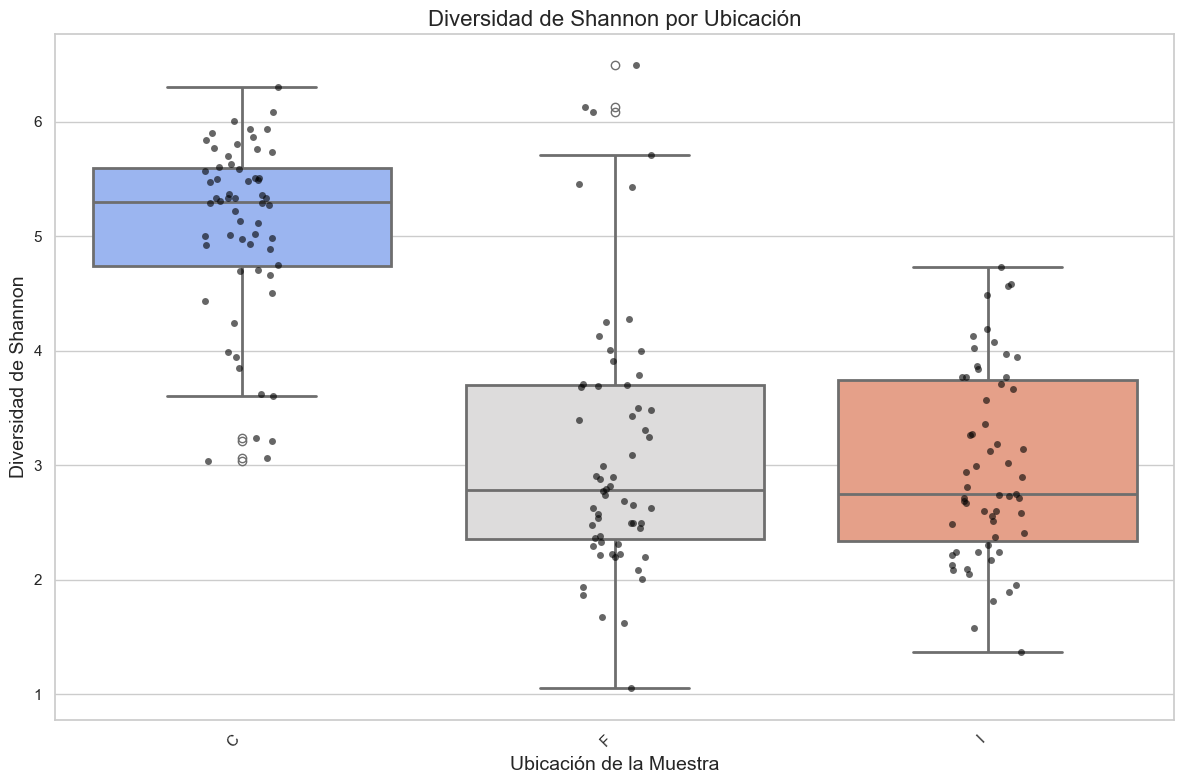

C:\Users\jmontoyas\AppData\Local\Temp\ipykernel_14040\281562721.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)


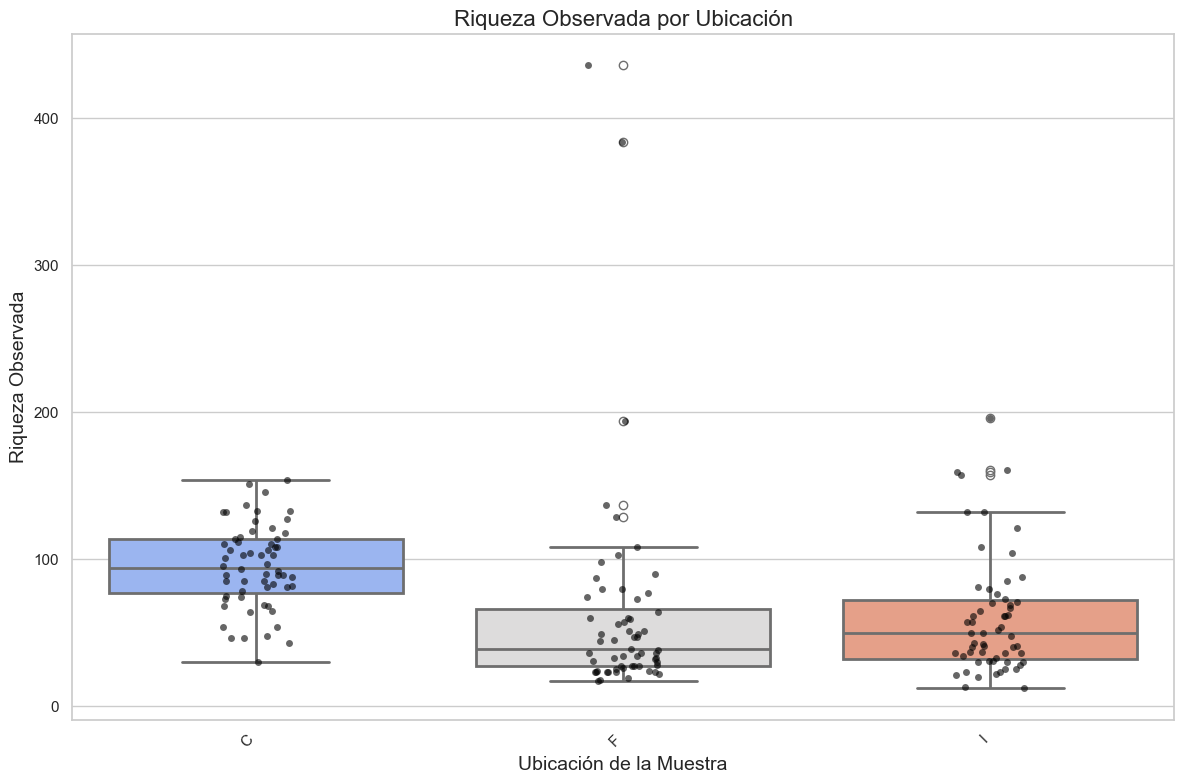

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el DataFrame desde tu fuente de datos (reemplaza 'tu_archivo.csv' con tu archivo real)
df = pd.read_csv('data/metadata_E347.csv')

# Configuración estética de seaborn
sns.set(style="whitegrid")

# Mejorando la paleta de colores
palette = sns.color_palette("coolwarm", n_colors=len(df['SampleLocation'].unique()))

# Boxplot para Alfa_Shannon
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Shannon', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Diversidad de Shannon por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Diversidad de Shannon', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot para Alfa_Observed
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Observed', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Riqueza Observada por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Riqueza Observada', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()